                                                      IMPORTING LIBRARIES

LIBRARIES USED:-

- Pandas
- Numpy
- Matplotlib
- Datetime
- Scipy.Stats
- Sklearn.model_selection, Sklearn.preprocessing,Sklearn.ensemble,Sklearn.metrics,Sklearn.liner_model,Sklearn.tree,Sklearn.naive_bayes and Sklearn.neighbors
- Seaborn


                                                      MODEL = "RANDOM FOREST CLASSIFIER"

In [1]:
! pip install numpy pandas matplotlib seaborn sklearn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt
from scipy.stats import mstats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns 


The below cell is reading dataset named as "weatherAUS.csv" containing weather data from Australia in a variable "data". The code is then asigning the 'RainTomorrow' column from that data to the variable `Y` that contains data on whether or not it rained the next day. It also assigns all other columns except 'RainTomorrow' to the variable `X` that contains the predictor or feature data like temperature, humidity, etc. 

The code is likely preparing the data for a machine learning model with `Y` as the target or label and `X` as the features. `Y` and `X` are common variable names used in machine learning to represent the target and features.

Reading in data from CSV files and splitting it into `X` (features) and `Y` (target) is a common first step when preparing data for a machine learning model.

In [3]:
data = pd.read_csv('weatherAUS.csv')
Y, X = data['RainTomorrow'], data.drop(['RainTomorrow'], axis=1)

The code is performing data imputation by filling in missing values (NaN) with the mean value for that column. It is doing this for 6 different columns in the dataset:

`X['MinTemp'].fillna(X['MinTemp'].mean(), inplace=True)`

This line is filling in any missing values (NaN) in the 'MinTemp' column with the mean value for that column. The `inplace=True` parameter means it is modifying the original dataframe and not creating a copy.  

It then does the same for the 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', and 'WindSpeed3pm' columns. 

Filling in missing values with the mean is a common imputation technique to have a complete dataset for analysis.

In [4]:
X['MinTemp'].fillna(X['MinTemp'].mean(), inplace=True)
X['MaxTemp'].fillna(X['MaxTemp'].mean(), inplace=True)
X['Rainfall'].fillna(X['Rainfall'].mean(), inplace=True)
X['WindGustSpeed'].fillna(X['WindGustSpeed'].mean(), inplace=True)
X['WindSpeed9am'].fillna(X['WindSpeed9am'].mean(), inplace=True)
X['WindSpeed3pm'].fillna(X['WindSpeed3pm'].mean(), inplace=True)


Below lines of code are dropping/removing two columns named 'Evaporation' and 'Sunshine' from the data frame X. The 'inplace=True' parameter means it's modifying the original data frame instead of creating a copy.

These had been dropped because they had approximately 50% of the values as "NAN".

Having columns with a lot of missing or null values can cause issues for many machine learning algorithms, so removing those columns is a common preprocessing step to clean the data.

In [5]:
X.drop(['Evaporation'],axis=1,inplace=True)
X.drop(['Sunshine'],axis=1,inplace=True)


Below line has a "lambda" function where the value is replaced to "1.0" if the "RainToday" column has a "Yes" else it is has been replaced to "0.0"

In [6]:
X['RainToday']=X['RainToday'].apply(lambda x: 1.0 if x=='Yes' else 0.0)


Below line has a "lambda" function where the "NAN" values are replaced to "mode" of all the "Non-null" values in the "RainToday" column

In [7]:
X['RainToday']=X['RainToday'].apply(lambda x: X['RainToday'].mode() if np.isnan(x) else x)

These lines of code are preprocessing a 'Date' column in a dataframe (called X) to extract the year, month and day from the date. Here's a breakdown of what each line is doing:

- X['Date']=pd.to_datetime(X['Date']) - This converts the 'Date' column from a string format into a datetime format, using the pandas to_datetime() function. 

- X['Year'] = X['Date'].dt.year - This extracts the year from the datetime column, creating a new 'Year' column.

- X['Month'] = X['Date'].dt.month - This extracts the month from the datetime column, creating a new 'Month' column.

- X['Day'] = X['Date'].dt.day - This extracts the day from the datetime column, creating a new 'Day' column.

- X.dropna(subset=['Date'],inplace=True) - This drops any rows with missing 'Date' values.

- X.drop('Date', axis=1, inplace=True) - This drops the original 'Date' column, since we now have the year, month and day columns.

So in summary, those lines are converting a 'Date' column into separate 'Year', 'Month' and 'Day' columns, dropping any rows with missing date values and then dropping the original 'Date' column.

In [8]:
X['Date']=pd.to_datetime(X['Date'])
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day
X.dropna(subset=['Date'],inplace=True)
X.drop('Date', axis=1, inplace=True)


These lines are performing data cleaning on the column Y of a dataframe.

The first line is replacing all 'Yes' values in Y with 1.0, and all other values with 0.0. This is converting the column into a binary column with 1 representing 'Yes' and 0 representing 'No' or any other value.

The second line is imputing missing values (represented by NaN) in Y with the mode of Y. This means that all NaN values will be replaced with the most frequently occurring value in Y.

This is a common data cleaning technique to convert categorical columns into binary columns, and to impute missing values before performing analysis on the data.

In [9]:
Y = Y.apply(lambda x: 1.0 if x == 'Yes' else 0.0)
Y = Y.apply(lambda x: Y.mode() if np.isnan(x) else x)

These lines are filling the missing (NAN) values in the "WindGustDir", "WindDir9am" and "WindDir3pm" columns of the "X" DataFrame. 

The ".fillna()" method is used to fill "NAN" values. It takes two arguments:

- The value to fill NA's with 
- inplace - whether to fill the original dataframe (True) or return a copy (False)

Here, the NA values are being filled with the "mode (most common)" value of each column.

In [10]:
X['WindGustDir'].fillna(X['WindGustDir'].mode()[0], inplace=True)
X['WindDir9am'].fillna(X['WindDir9am'].mode()[0], inplace=True)
X['WindDir3pm'].fillna(X['WindDir3pm'].mode()[0], inplace=True)

These lines are filling in missing values in the data columns with the median value for that column.

This is filling in any missing values in the `Humidity9am` column with the median value of that column, and doing so inplace (overwriting the original data).

It then does the same for:

- `Humidity3pm`  
- `Pressure9am`
- `Pressure3pm` 
- `Cloud9am`
- `Cloud3pm`
- `Temp9am`
- `Temp3pm`

So in summary, it is imputing the median value for each column to fill in any missing data in that column. This is a common technique when you have missing data.

In [11]:
X['Humidity9am'].fillna(X['Humidity9am'].median(), inplace=True)
X['Humidity3pm'].fillna(X['Humidity3pm'].median(), inplace=True)
X['Pressure9am'].fillna(X['Pressure9am'].median(), inplace=True)
X['Pressure3pm'].fillna(X['Pressure3pm'].median(), inplace=True)
X['Cloud9am'].fillna(X['Cloud9am'].median(), inplace=True)
X['Cloud3pm'].fillna(X['Cloud3pm'].median(), inplace=True)
X['Temp9am'].fillna(X['Temp9am'].median(), inplace=True)
X['Temp3pm'].fillna(X['Temp3pm'].median(), inplace=True)



These lines are performing one-hot encoding on the data in the dataframe X. One-hot encoding is a technique to convert categorical variables into a format that machine learning algorithms can understand.

Specifically, these lines are:

- pd.get_dummies(X,columns=['WindGustDir'],dtype=float)

This is one-hot encoding the "WindGustDir" column in the X dataframe. It will convert that column, which has categorical values, into multiple binary columns, with 1 representing the presence of that category and 0 for absence. The "dtype=float" specifies the data type of the new columns.

- pd.get_dummies(X,columns=['WindDir9am'],dtype=float) 

This is doing the same for the 'WindDir9am' column.

- pd.get_dummies(X,columns=['WindDir3pm'],dtype=float)

And this for the 'WindDir3pm' column.

- pd.get_dummies(X,columns=['Location'],dtype=float) 

Finally, this line is one-hot encoding the 'Location' column.

So in summary, these lines are converting categorical columns in the X dataframe into a numerical format using one-hot encoding, to make the data suitable for machine learning algorithms.

In [12]:
X=pd.get_dummies(X,columns=['WindGustDir'],dtype=float)
X=pd.get_dummies(X,columns=['WindDir9am'],dtype=float)
X=pd.get_dummies(X,columns=['WindDir3pm'],dtype=float)
X=pd.get_dummies(X,columns=['Location'],dtype=float)

".info()" is typically used to display information about the DataFrame (tabular data) represented by "X" and "Y". This is a common operation when working with data analysis libraries in Python, such as Pandas.

1. `X.info()`
   - The `info()` method provides a concise summary of the DataFrame, including the number of non-null values, data types, and memory usage.   It's useful for quickly getting an overview of the DataFrame's structure and identifying potential missing data or data type issues.

2. `Y.info()`
   - Similar to the previous line, this code calls the `info()` method on the DataFrame `Y`.

Overall, these lines of code are very useful for initial data exploration and understanding the composition of DataFrames in Pandas, particularly when dealing with large datasets.

In [13]:
X.info()
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Columns: 115 entries, MinTemp to Location_Woomera
dtypes: float64(112), int32(3)
memory usage: 126.0 MB
<class 'pandas.core.series.Series'>
RangeIndex: 145460 entries, 0 to 145459
Series name: RainTomorrow
Non-Null Count   Dtype  
--------------   -----  
145460 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


The below lines of code is using the `winsorize` function from `scipy.stats.mstats` module to perform "winsorization" on specific columns of a DataFrame `X`. Winsorization is a statistical method used to handle outliers by limiting extreme values to a specified percentile.

1. `mstats.winsorize(X['WindGustSpeed'], limits=[0.05, 0.05])`
   - This line applies winsorization to the column 'WindGustSpeed' in `X`.
   - The `winsorize` function takes two arguments: the data to be winsorized (`X['WindGustSpeed']`), and the `limits` parameter, which specifies the proportion of values to be trimmed from both tails of the distribution. In this case, it trims 5% of the lowest and 5% of the highest values, effectively limiting extreme values.

2. The subsequent lines perform the same operation as the first line but for different columns in DataFrame `X`. Each line applies winsorization to a specific column in the DataFrame using the `mstats.winsorize()` function and the `limits` parameter.

The purpose of winsorization in this context is likely to handle outliers or extreme values in the specified columns. Instead of removing or imputing outliers, winsorization replaces them with less extreme values, which can help make the data more robust to the influence of outliers and lead to more stable and reliable analyses.

After running these lines of code, the DataFrame `X` will have its specified columns (e.g., 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', etc.) winsorized, and extreme values will be replaced by values at the 5th and 95th percentiles of their respective columns.

In [14]:
X['WindGustSpeed'] = mstats.winsorize(X['WindGustSpeed'], limits=[0.05, 0.05])
X['WindSpeed9am'] = mstats.winsorize(X['WindSpeed9am'], limits=[0.05, 0.05])
X['WindSpeed3pm'] = mstats.winsorize(X['WindSpeed3pm'], limits=[0.05, 0.05])
X['MinTemp'] = mstats.winsorize(X['MinTemp'], limits=[0.05, 0.05])
X['MaxTemp'] = mstats.winsorize(X['MaxTemp'], limits=[0.05, 0.05])
X['Humidity9am'] = mstats.winsorize(X['Humidity9am'], limits=[0.05, 0.05])
X['Temp9am'] = mstats.winsorize(X['Temp9am'], limits=[0.05, 0.05])
X['Temp3pm'] = mstats.winsorize(X['Temp3pm'], limits=[0.05, 0.05])
X['Cloud3pm'] = mstats.winsorize(X['Cloud3pm'], limits=[0.05, 0.05])
X['Cloud9am'] = mstats.winsorize(X['Cloud9am'], limits=[0.05, 0.05])
X['Pressure9am'] = mstats.winsorize(X['Pressure9am'], limits=[0.05, 0.05])
X['Pressure3pm'] = mstats.winsorize(X['Pressure3pm'], limits=[0.05, 0.05])
X['Rainfall'] = mstats.winsorize(X['Rainfall'], limits=[0.05, 0.05])

The given line of code is performing a data split using the `train_test_split` function from the `sklearn.model_selection` module. This function is commonly used in machine learning to split a dataset into training and testing sets.

- `X`: This is the input data. It contains the features (independent variables) used to train and test the machine learning model.

- `Y`: This is the target data, representing the corresponding labels or dependent variable values associated with the features in `X`. It's also represented as a Pandas Series or NumPy array.

- `random_state=0`: The `random_state` parameter is an optional argument used to control the random shuffling of the data before splitting. By setting `random_state` to a fixed integer (in this case, 0), you ensure that each time you run this line of code, the data split will be the same, making the results reproducible. If you set `random_state` to `None`, the data will be split differently each time you run the code.

- `test_size=0.2`: The `test_size` parameter specifies the proportion of the data that should be reserved for the test set. In this case, 20% of the data will be used for testing, while the remaining 80% will be used for training. The test set is essential for evaluating the model's performance on unseen data and checking for overfitting.

After executing this line of code, the data will be split into four sets:

- `X_train`: This will contain the training features, which make up 80% of the original data. These features will be used to train the machine learning model.

- `X_test`: This will contain the test features, which make up the remaining 20% of the data. These features will be used to evaluate the model's performance on unseen data.

- `Y_train`: This will contain the corresponding training labels, which align with the `X_train` data.

- `Y_test`: This will contain the corresponding test labels, which align with the `X_test` data.

With this data split, you can now proceed to train a machine learning model using `X_train` and `Y_train`, and then evaluate its performance using `X_test` and `Y_test`. This approach helps in assessing how well the model generalizes to new, unseen data.

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.2)


The given lines of code are performing data scaling using the `MinMaxScaler` from the `sklearn.preprocessing` module. Data scaling is a common preprocessing step in machine learning to bring all features to a similar scale. MinMaxScaler is one of the techniques used for scaling numerical features.

1. `scaler = MinMaxScaler()`
   - This line creates an instance of the `MinMaxScaler` class. The `MinMaxScaler` scales features to a given range, usually between 0 and 1, by linearly transforming them.

2. `X_train = scaler.fit_transform(X_train)`
   - This line scales the training features (`X_train`) using the `fit_transform` method of the `MinMaxScaler`.
   - The `fit_transform` method first fits the scaler to the data (`X_train`) to learn the minimum and maximum values of each feature. It then performs the scaling transformation on the training data, bringing all the features within the range of [0, 1].
   - The purpose of scaling is to ensure that each feature contributes equally to the model training process and prevents features with larger scales from dominating the model.

3. `X_test = scaler.transform(X_test)`
   - This line scales the test features (`X_test`) using the previously fitted `MinMaxScaler`.
   - The `transform` method applies the same scaling transformation to the test data that was learned from the training data (`X_train`). This is important because the model should be evaluated on data that has the same scale as the data it was trained on.

4. `Y_train = scaler.fit_transform(Y_train)`
   - This line attempts to scale the target variable (`Y_train`). However, it is important to note that scaling the target variable in regression tasks is not a standard practice, especially with MinMaxScaler. In most cases, target variables are not scaled since scaling them can affect the interpretability of the model's predictions and lead to incorrect results.

5. `Y_test = scaler.transform(Y_test)`
   - Similar to the previous line, this line attempts to scale the test target variable (`Y_test`). As mentioned earlier, scaling target variables is not typical and may lead to incorrect evaluation results.

In summary, the primary goal of these lines of code is to scale the features (`X_train` and `X_test`) using the `MinMaxScaler` to ensure that all features have a similar scale and do not dominate the model training. However, it's important to note that scaling the target variable (`Y_train` and `Y_test`) is generally not necessary and may not be appropriate for most machine learning tasks, especially regression tasks.

In [16]:
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


These lines of code implement a K-Nearest Neighbors (KNN) classification model, fit the model on the training data, make predictions on the test data, and calculate the accuracy score of the KNN model.

1. `knn=KNeighborsClassifier(n_neighbors=3)`: This line creates a KNN classifier object named `knn` with the parameter `n_neighbors=5`. The `n_neighbors` parameter specifies the number of neighbors to consider when making predictions. In this case, `n_neighbors=5` means that the KNN algorithm will consider the five closest neighbors to the input data point.

2. `knn.fit(X_train,Y_train)`: This line fits the KNN model to the training data. The `fit` method takes two arguments: `X_train` and `Y_train`. `X_train` is the feature matrix that contains the input features of the training data, and `Y_train` is the target vector that contains the corresponding labels or classes for each data point in `X_train`. The KNN algorithm uses this training data to learn and build its internal model.

3. `Y_pred_knn=knn.predict(X_test)`: This line makes predictions on the test data using the trained KNN model. The `predict` method takes `X_test` as input, which contains the feature matrix of the test data. It returns the predicted labels for the test data points and assigns them to the variable `Y_pred_knn`.

4. `acc_knn=round(knn.score(X_train,Y_train)*100,2)`: This line calculates the accuracy score of the KNN model on the training data and stores it in the variable `acc_knn`. The `score` method of the KNN classifier computes the mean accuracy on the given test data and labels. It takes two arguments: `X_train` (the feature matrix of the training data) and `Y_train` (the true labels for the training data). The accuracy score represents the percentage of correct predictions made by the model on the training data. The `round` function is used to round the accuracy score to two decimal places for better readability.

5. `print("Accuracy score of KNN model is:",acc_knn)`: Finally, this line prints the accuracy score of the KNN model on the training data, which was calculated in the previous step.

In summary, these lines of code train a KNN classification model, make predictions on the test data, and output the accuracy of the model on the training data. It's important to note that evaluating the model's performance on the training data is not sufficient to assess its generalization ability. To have a more reliable estimate of the model's performance, it is crucial to evaluate it on a separate, unseen test dataset.

In [17]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
acc_knn=round(knn.score(X_train,Y_train)*100,2)
print("Accuracy score of KNN model is:",acc_knn)

Accuracy score of KNN model is: 87.69


These lines of code implement a Random Forest classifier, fit the model on the training data, make predictions on the test data, and then calculate and print the accuracy score of the Random Forest model.

Here's a breakdown of each line:

1. `rfc = RandomForestClassifier(n_estimators=100, random_state=42)`: This line creates a Random Forest classifier object named `rfc`. Random Forest is an ensemble learning method that combines multiple decision trees to improve performance and reduce overfitting. The `n_estimators` parameter specifies the number of decision trees to be included in the forest. In this case, `n_estimators=100`, which means the Random Forest will be composed of 100 decision trees. The `random_state` parameter is set to 42 to ensure reproducibility of results when the code is run multiple times.

2. `rfc.fit(X_train, Y_train)`: This line fits the Random Forest model to the training data. The `fit` method takes two arguments: `X_train` and `Y_train`. `X_train` is the feature matrix that contains the input features of the training data, and `Y_train` is the target vector that contains the corresponding class labels for each data point in `X_train`. The Random Forest algorithm creates each decision tree by randomly selecting a subset of the data (with replacement) and a subset of features for each split, which leads to diversity among the trees.

3. `Y_pred_random = rfc.predict(X_test)`: This line makes predictions on the test data using the trained Random Forest model. The `predict` method takes `X_test` as input, which contains the feature matrix of the test data. It returns the predicted class labels for the test data points and assigns them to the variable `Y_pred_random`.

4. `print('Accuracy: ', accuracy_score(Y_test, Y_pred_random))`: This line calculates and prints the accuracy score of the Random Forest model on the test data. The `accuracy_score` function from the `sklearn.metrics` module is used for this calculation. It takes two arguments: `Y_test` (the true class labels for the test data) and `Y_pred_random` (the predicted class labels for the test data). The accuracy score represents the percentage of correct predictions made by the model on the test data.

In summary, these lines of code create and train a Random Forest classifier with 100 decision trees, make predictions on the test data, and then print the accuracy score of the model. Random Forest is a powerful ensemble method that often performs well in a variety of tasks due to its ability to reduce overfitting and capture complex relationships in the data. The accuracy score provides an assessment of how well the Random Forest model predicts the class labels on the test data. However, it's essential to consider other evaluation metrics and the specific requirements of the problem for a comprehensive evaluation of the model's performance.

In [18]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, Y_train)
Y_pred_random = rfc.predict(X_test)
print(confusion_matrix(Y_test, Y_pred_random))
print(classification_report(Y_test, Y_pred_random))
accuracy = accuracy_score(Y_test, Y_pred_random)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[[21828   898]
 [ 3385  2981]]
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     22726
         1.0       0.77      0.47      0.58      6366

    accuracy                           0.85     29092
   macro avg       0.82      0.71      0.75     29092
weighted avg       0.84      0.85      0.84     29092

Accuracy: 85.28%


These lines of code create a pie chart to visualize the percentage distribution of "Yes" and "No" values in the "RainToday" column of the training data. The pie chart provides an easy-to-understand representation of the data, showing the proportion of each category relative to the whole.

1. `d = X['RainToday'].value_counts()`: This line calculates the frequency of each unique value in the "RainToday" column of the training data (`X`). The `value_counts()` method counts the occurrences of each unique value and returns a Pandas Series object with the counts, where the unique values are the index, and the counts are the values.

2. `labels = list(d.index)`: This line creates a list `labels` containing the unique values present in the "RainToday" column. The unique values are extracted from the index of the Pandas Series `d`.

3. `labels[0] = 'No'` and `labels[1] = 'Yes'`: This line modifies the labels to use "No" and "Yes" instead of the original unique values in the list `labels`. This step is done to make the pie chart more descriptive and understandable.

4. `explode = (0.1, 0)`: This line specifies the "explode" parameter for the pie chart. The "explode" parameter is used to emphasize a specific slice of the pie chart by pulling it slightly away from the center. In this case, the first slice (corresponding to "No") is pulled away from the center by 0.1 times the radius of the pie.

5. `plt.pie(d, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)`: This line creates the actual pie chart using Matplotlib's `plt.pie()` function. The `d` parameter provides the counts of each unique value, `labels` provides the labels for each slice, `explode` specifies the degree of separation for specific slices, `autopct='%1.1f%%'` displays the percentage of each slice on the chart with one decimal point, `shadow=True` adds a shadow effect to the chart, and `startangle=90` sets the starting angle for the first slice at 90 degrees (i.e., the "No" slice will be positioned at the top).

6. `plt.title('Rain Today')`: This line adds a title to the pie chart, which will be displayed at the top of the chart.

7. `plt.show()`: This line displays the pie chart on the screen.

In summary, these lines of code create and display a pie chart showing the percentage distribution of "Yes" and "No" values in the "RainToday" column of the training data. The chart allows us to quickly visualize the proportion of rainy days ("Yes") and non-rainy days ("No") in the dataset.

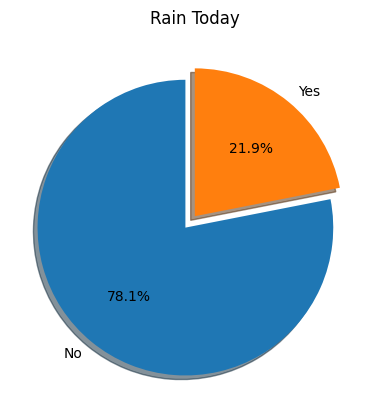

In [19]:
d = X['RainToday'].value_counts()
labels = list(d.index)
labels[0] = 'No'
labels[1] = 'Yes'
explode = (0.1, 0)
plt.pie(d, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Rain Today')
plt.show()

These lines of code create a pie chart to visualize the percentage distribution of "Yes" and "No" values in the "RainTomorrow" column, which represents the output variable. The pie chart provides an easy-to-understand representation of the data, showing the proportion of each category relative to the whole.

1. `d = Y.value_counts()`: This line calculates the frequency of each unique value in the "RainTomorrow" column, which is the output variable (`Y`). The `value_counts()` method counts the occurrences of each unique value and returns a Pandas Series object with the counts, where the unique values are the index, and the counts are the values.

2. `labels = list(d.index)`: This line creates a list `labels` containing the unique values present in the "RainTomorrow" column. The unique values are extracted from the index of the Pandas Series `d`.

3. `labels[0] = 'No'` and `labels[1] = 'Yes'`: This line modifies the labels to use "No" and "Yes" instead of the original unique values in the list `labels`. This step is done to make the pie chart more descriptive and understandable.

4. `explode = (0.1, 0)`: This line specifies the "explode" parameter for the pie chart. The "explode" parameter is used to emphasize a specific slice of the pie chart by pulling it slightly away from the center. In this case, the first slice (corresponding to "No") is pulled away from the center by 0.1 times the radius of the pie.

5. `plt.pie(d, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)`: This line creates the actual pie chart using Matplotlib's `plt.pie()` function. The `d` parameter provides the counts of each unique value, `labels` provides the labels for each slice, `explode` specifies the degree of separation for specific slices, `autopct='%1.1f%%'` displays the percentage of each slice on the chart with one decimal point, `shadow=True` adds a shadow effect to the chart, and `startangle=90` sets the starting angle for the first slice at 90 degrees (i.e., the "No" slice will be positioned at the top).

6. `plt.title('Rain Tomorrow')`: This line adds a title to the pie chart, which will be displayed at the top of the chart.

7. `plt.show()`: This line displays the pie chart on the screen.

In summary, these lines of code create and display a pie chart showing the percentage distribution of "Yes" and "No" values in the "RainTomorrow" column, which represents the output variable. The chart allows us to quickly visualize the proportion of days with rain ("Yes") and days without rain ("No") in the dataset.

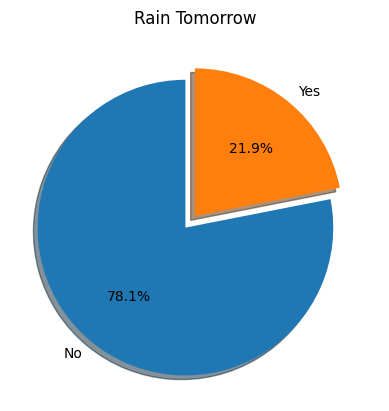

In [20]:
d = Y.value_counts()
labels = list(d.index)
labels[0] = 'No'
labels[1] = 'Yes'
explode = (0.1, 0)
plt.pie(d, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Rain Tomorrow')
plt.show()

These lines of code create a pie chart to compare the percentage distribution of "Rain Today" and "Rain Tomorrow" in the dataset. The pie chart allows us to visualize the proportions of these two categories relative to each other.

1. `labels = 'Rain Today', 'Rain Tomorrow'`: This line creates a tuple named `labels`, which contains the labels for the two categories: "Rain Today" and "Rain Tomorrow". These labels will be used to identify the two slices in the pie chart.

2. `sizes = [X['RainToday'].value_counts()[1], X['RainToday'].value_counts()[0]]`: This line creates a list named `sizes`, which contains the counts of "Yes" and "No" values in the "RainToday" column of the dataset `X`. The `value_counts()` method is used to count the occurrences of each unique value in the "RainToday" column. Index `1` corresponds to the count of "Yes" values (indicating rain today), and index `0` corresponds to the count of "No" values (indicating no rain today).

3. `explode = (0, 0.1)`: This line specifies the "explode" parameter for the pie chart. The "explode" parameter is used to pull one or more slices of the pie chart away from the center for emphasis. In this case, the second slice (corresponding to "Rain Tomorrow") is pulled away from the center by 0.1 times the radius of the pie.

4. `fig1, ax1 = plt.subplots()`: This line creates a new figure (`fig1`) and a set of subplots (`ax1`) using Matplotlib's `subplots()` function. This step is necessary to have more control over the pie chart's appearance and layout.

5. `ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)`: This line creates the actual pie chart on the `ax1` subplot using Matplotlib's `pie()` function. The `sizes` parameter provides the counts for each slice, `explode` specifies the degree of separation for the second slice, `labels` provides the labels for each slice, `autopct='%1.2f%%'` displays the percentage of each slice on the chart with two decimal points, `shadow=True` adds a shadow effect to the chart, and `startangle=90` sets the starting angle for the first slice at 90 degrees (i.e., the "Rain Today" slice will be positioned at the top).

6. `ax1.axis('equal')`: This line sets the aspect ratio of the pie chart to be equal, ensuring that it appears as a circle and not an ellipse.

7. `plt.show()`: This line displays the pie chart on the screen.

In summary, these lines of code create and display a pie chart that visually compares the percentage distribution of "Rain Today" and "Rain Tomorrow" in the dataset. The chart shows the proportion of days with rain today and the proportion of days that will have rain tomorrow relative to each other.

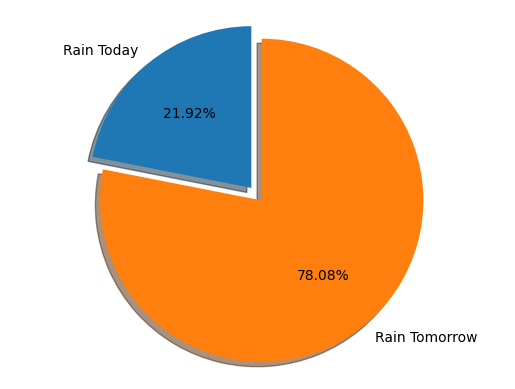

In [21]:
labels = 'Rain Today', 'Rain Tomorrow'
sizes = [X['RainToday'].value_counts()[1], X['RainToday'].value_counts()[0]]
explode = (0, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()



These lines of code create a box plot to visualize the distribution of five numerical features ('MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', and 'WindSpeed3pm') in the dataset `X`. The box plot is a useful tool for understanding the central tendency, variability, and potential outliers in the data.

1. `a1 = ['MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']`: This line creates a list named `a1`, containing the names of the five numerical features ('MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', and 'WindSpeed3pm') that will be plotted in the box plot.

2. `plt.figure(figsize=(20,10))`: This line creates a new figure for the plot using Matplotlib's `figure()` function. The `figsize` parameter is set to `(20, 10)`, which specifies the width and height of the figure in inches. The larger `figsize` values create a wider and taller plot, making it easier to visualize multiple box plots side by side.

3. `sns.boxplot(data=X[a1], palette="Set2")`: This line creates the box plot using Seaborn's `boxplot()` function. The `data` parameter is set to `X[a1]`, which selects only the columns specified in the list `a1` from the dataset `X`. This way, the box plot displays only the selected numerical features. The `palette` parameter is set to "Set2" to choose a specific color palette for the boxes and whiskers.

4. `plt.xticks(rotation=90)`: This line rotates the x-axis tick labels by 90 degrees to avoid overlap when displaying the feature names. This makes the plot more readable when there are multiple features with longer names.

5. `plt.show()`: This line displays the box plot on the screen.

In summary, these lines of code create and display a box plot that shows the distribution of 'MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed9am', and 'WindSpeed3pm' in the dataset `X`. The box plot provides information about the median, quartiles, and potential outliers for each feature, helping to understand their central tendency and spread. The Seaborn library is used to create the box plot, making it easy to create visually appealing and informative plots.

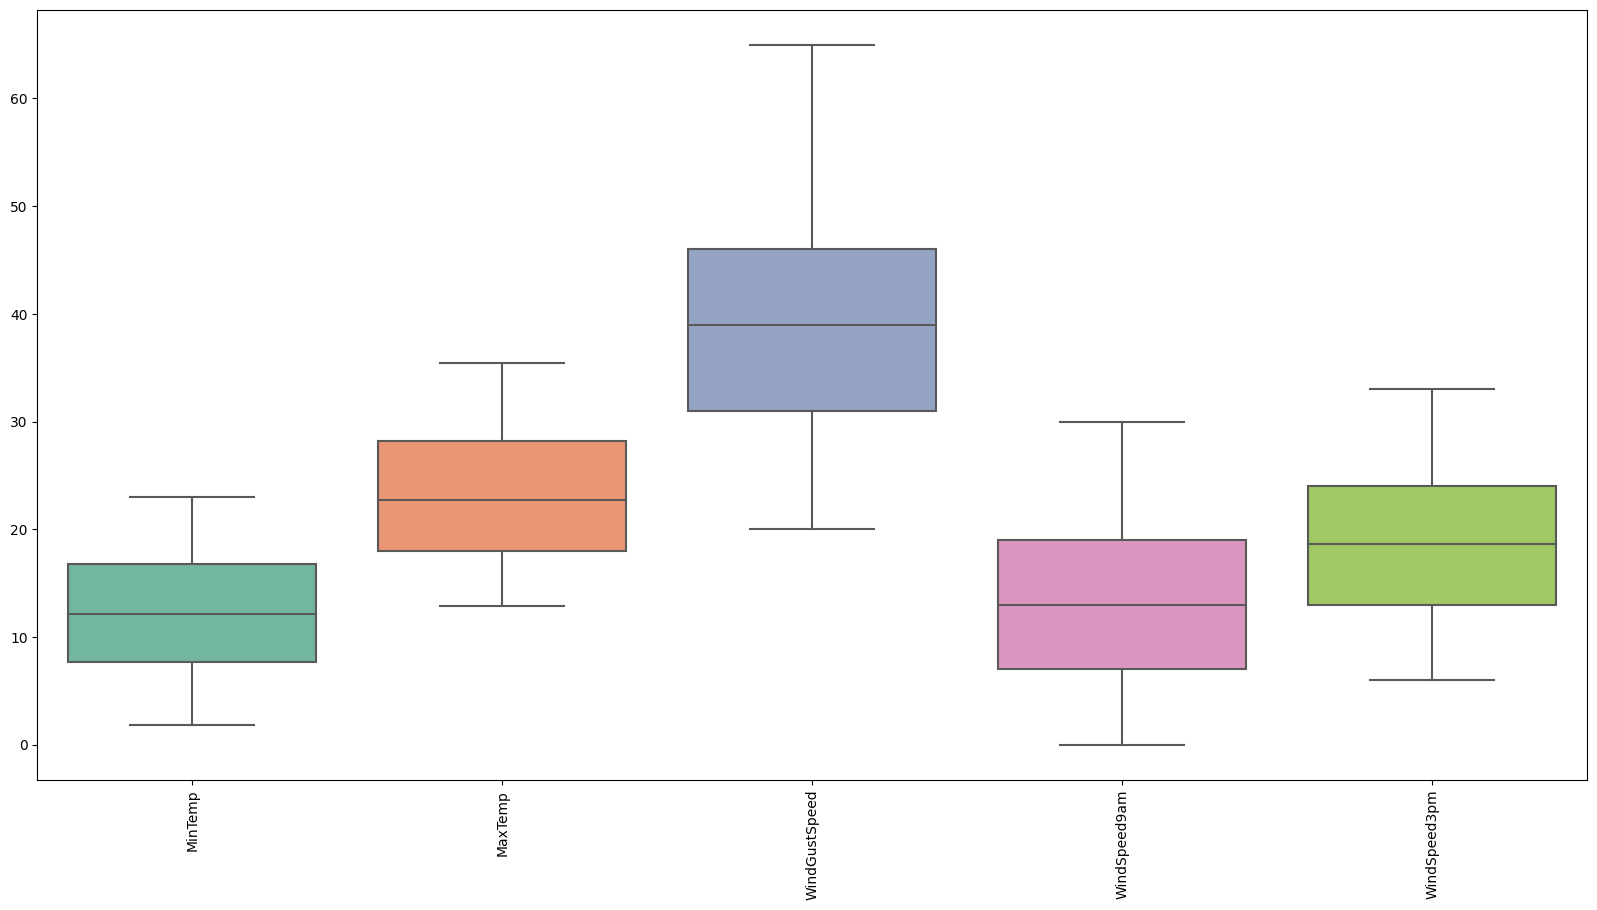

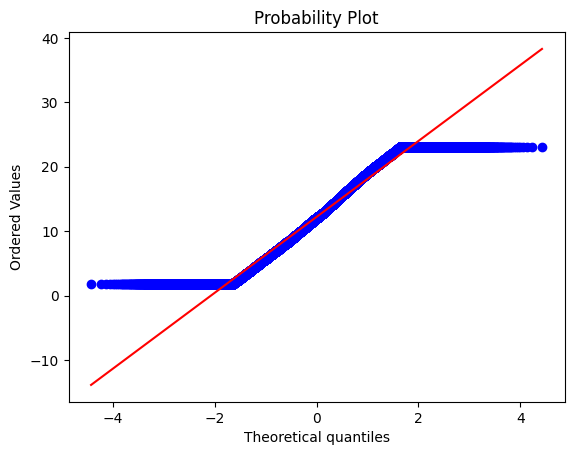

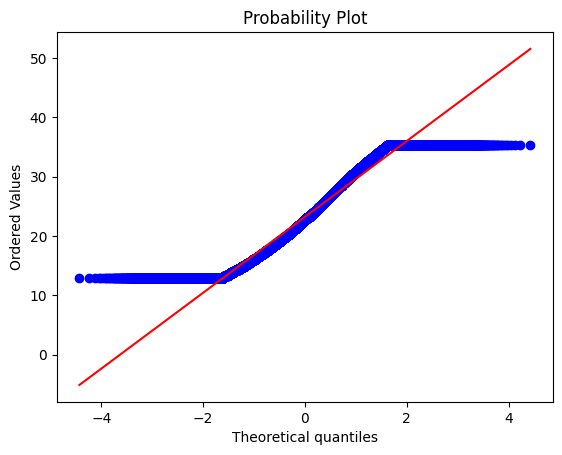

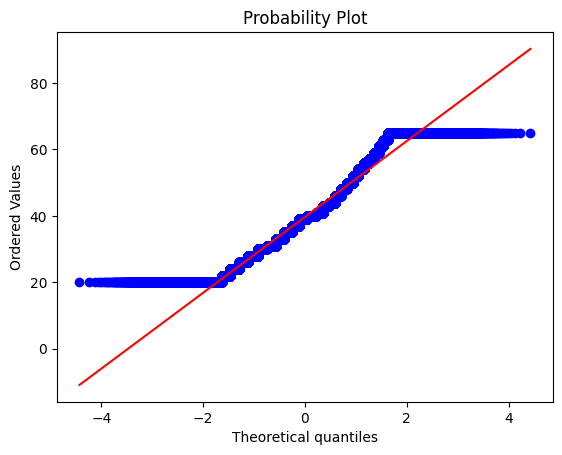

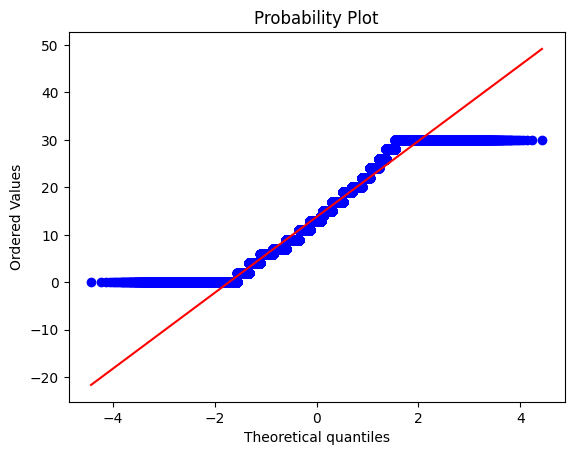

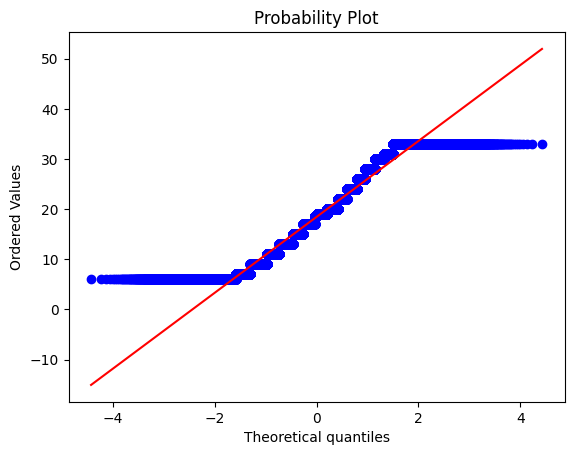

In [22]:
from scipy import stats
import pylab
a1 = ['MinTemp', 'MaxTemp','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm']
plt.figure(figsize=(20,10))
sns.boxplot(data=X[a1], palette="Set2")
plt.xticks(rotation=90)
plt.show()
for i in a1:
    #q-q plot
    stats.probplot(X[i], dist="norm", plot=pylab)
    pylab.show()

These lines of code create a box plot to visualize the distribution of three numerical features ('Pressure9am', 'Pressure3pm', and 'Rainfall') in the dataset `X`. The box plot is a graphical representation that provides insights into the central tendency, spread, and potential outliers of the data.

1. `a2 = ['Pressure9am', 'Pressure3pm', 'Rainfall']`: This line creates a list named `a2`, containing the names of the three numerical features ('Pressure9am', 'Pressure3pm', and 'Rainfall') that will be plotted in the box plot.

2. `plt.figure(figsize=(20,10))`: This line creates a new figure for the plot using Matplotlib's `figure()` function. The `figsize` parameter is set to `(20, 10)`, which specifies the width and height of the figure in inches. The larger `figsize` values create a wider and taller plot, making it easier to visualize multiple box plots side by side.

3. `sns.boxplot(data=X[a2], palette="Set2")`: This line creates the box plot using Seaborn's `boxplot()` function. The `data` parameter is set to `X[a2]`, which selects only the columns specified in the list `a2` from the dataset `X`. This way, the box plot displays only the selected numerical features. The `palette` parameter is set to "Set2" to choose a specific color palette for the boxes and whiskers.

4. `plt.xticks(rotation=90)`: This line rotates the x-axis tick labels by 90 degrees to avoid overlap when displaying the feature names. This makes the plot more readable when there are multiple features with longer names.

5. `plt.show()`: This line displays the box plot on the screen.

In summary, these lines of code create and display a box plot that shows the distribution of 'Pressure9am', 'Pressure3pm', and 'Rainfall' in the dataset `X`. The box plot provides information about the median, quartiles, and potential outliers for each feature, helping to understand their central tendency and spread. The Seaborn library is used to create the box plot, making it easy to create visually appealing and informative plots. The `figsize` parameter is used to control the size of the plot, making it larger for better visibility when displaying multiple box plots side by side.

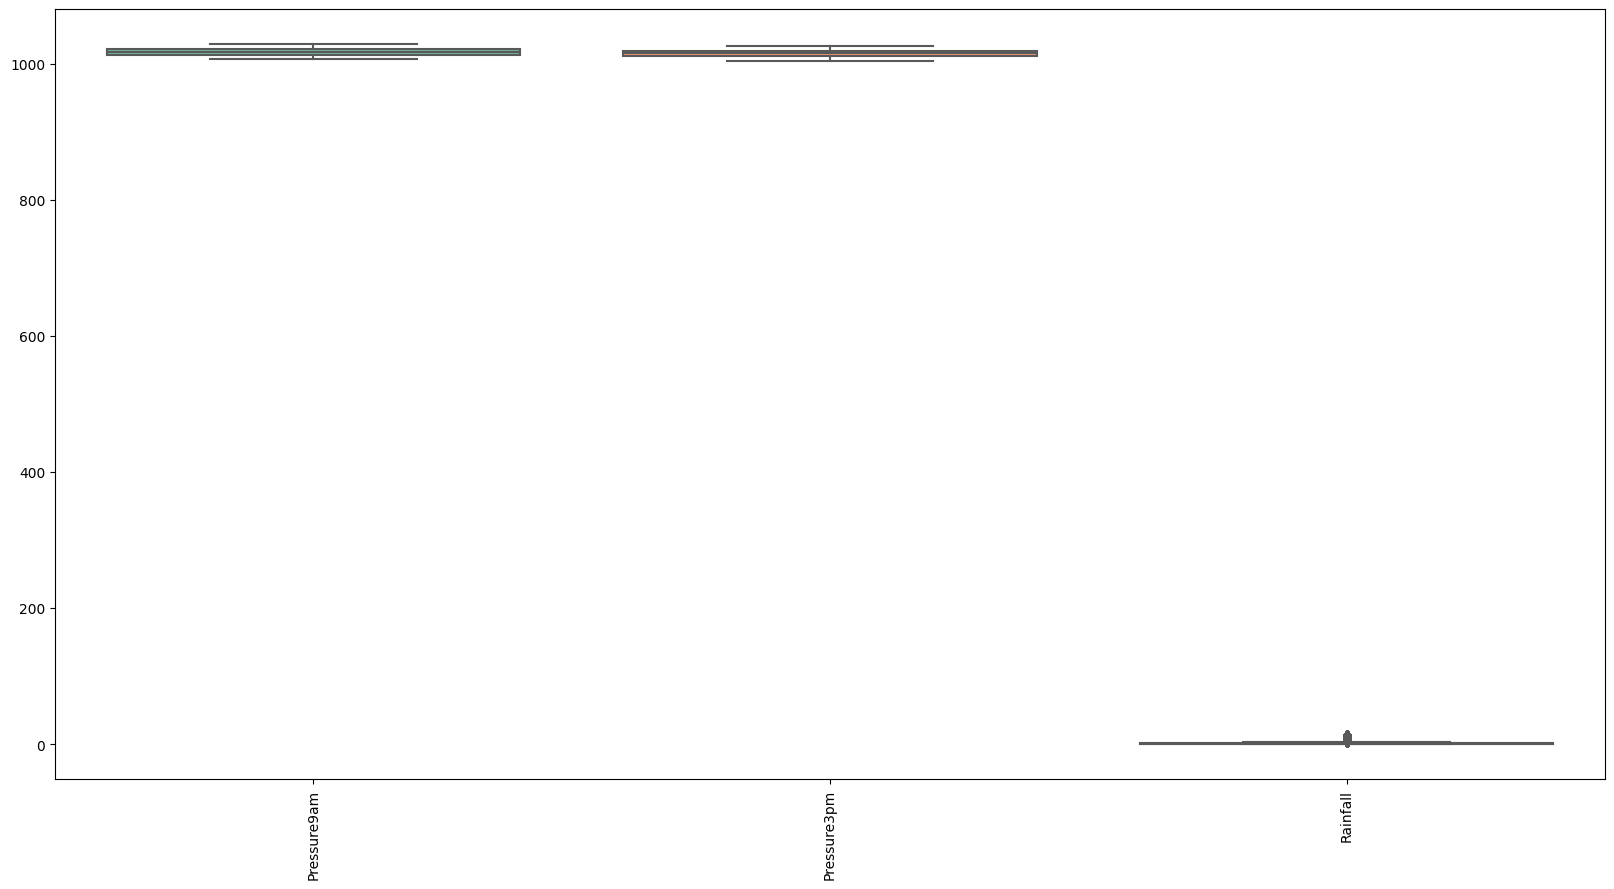

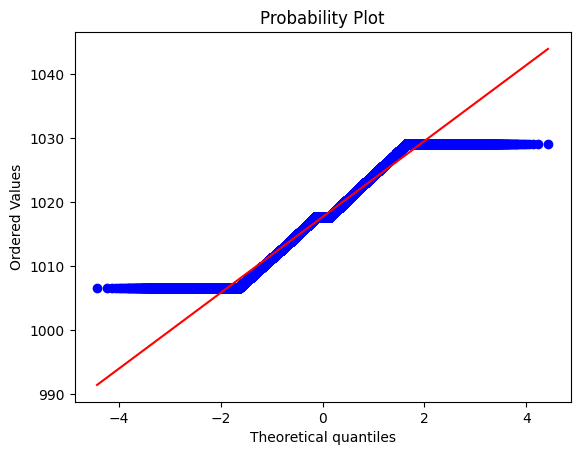

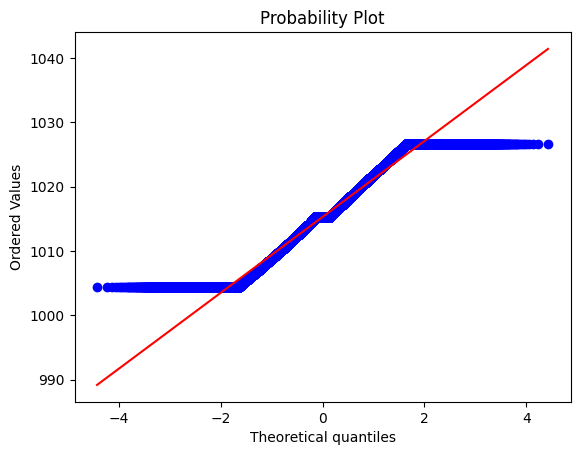

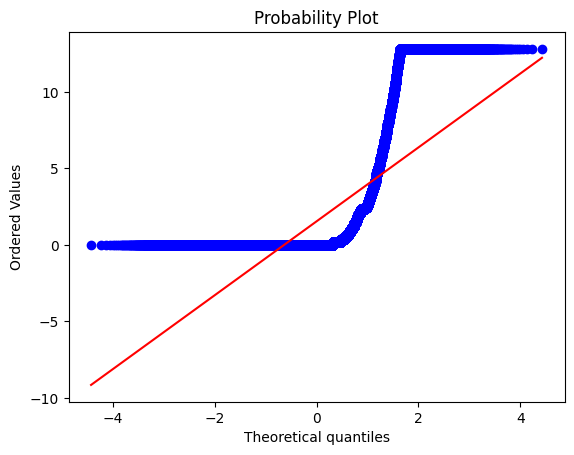

In [23]:
from scipy import stats
import pylab

a2 = ['Pressure9am', 'Pressure3pm', 'Rainfall'] 
plt.figure(figsize=(20,10))
sns.boxplot(data=X[a2], palette="Set2")
plt.xticks(rotation=90)
plt.show()
for i in a2:
    #q-q plot
    stats.probplot(X[i], dist="norm", plot=pylab)
    pylab.show()

These lines of code create a box plot to visualize the distribution of six numerical features ('Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', and 'Temp3pm') in the dataset `X`. The box plot is a graphical representation that provides insights into the central tendency, spread, and potential outliers of the data.

1. `a3 = ['Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']`: This line creates a list named `a3`, containing the names of the six numerical features that will be plotted in the box plot.

2. `plt.figure(figsize=(20,10))`: This line creates a new figure for the plot using Matplotlib's `figure()` function. The `figsize` parameter is set to `(20, 10)`, which specifies the width and height of the figure in inches. The larger `figsize` values create a wider and taller plot, making it easier to visualize multiple box plots side by side.

3. `sns.boxplot(data=X[a3], palette="Set2")`: This line creates the box plot using Seaborn's `boxplot()` function. The `data` parameter is set to `X[a3]`, which selects only the columns specified in the list `a3` from the dataset `X`. This way, the box plot displays only the selected numerical features. The `palette` parameter is set to "Set2" to choose a specific color palette for the boxes and whiskers.

4. `plt.xticks(rotation=90)`: This line rotates the x-axis tick labels by 90 degrees to avoid overlap when displaying the feature names. This makes the plot more readable when there are multiple features with longer names.

5. `plt.show()`: This line displays the box plot on the screen.

In summary, these lines of code create and display a box plot that shows the distribution of 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', and 'Temp3pm' in the dataset `X`. The box plot provides information about the median, quartiles, and potential outliers for each feature, helping to understand their central tendency and spread. The Seaborn library is used to create the box plot, making it easy to create visually appealing and informative plots. The `figsize` parameter is used to control the size of the plot, making it larger for better visibility when displaying multiple box plots side by side.

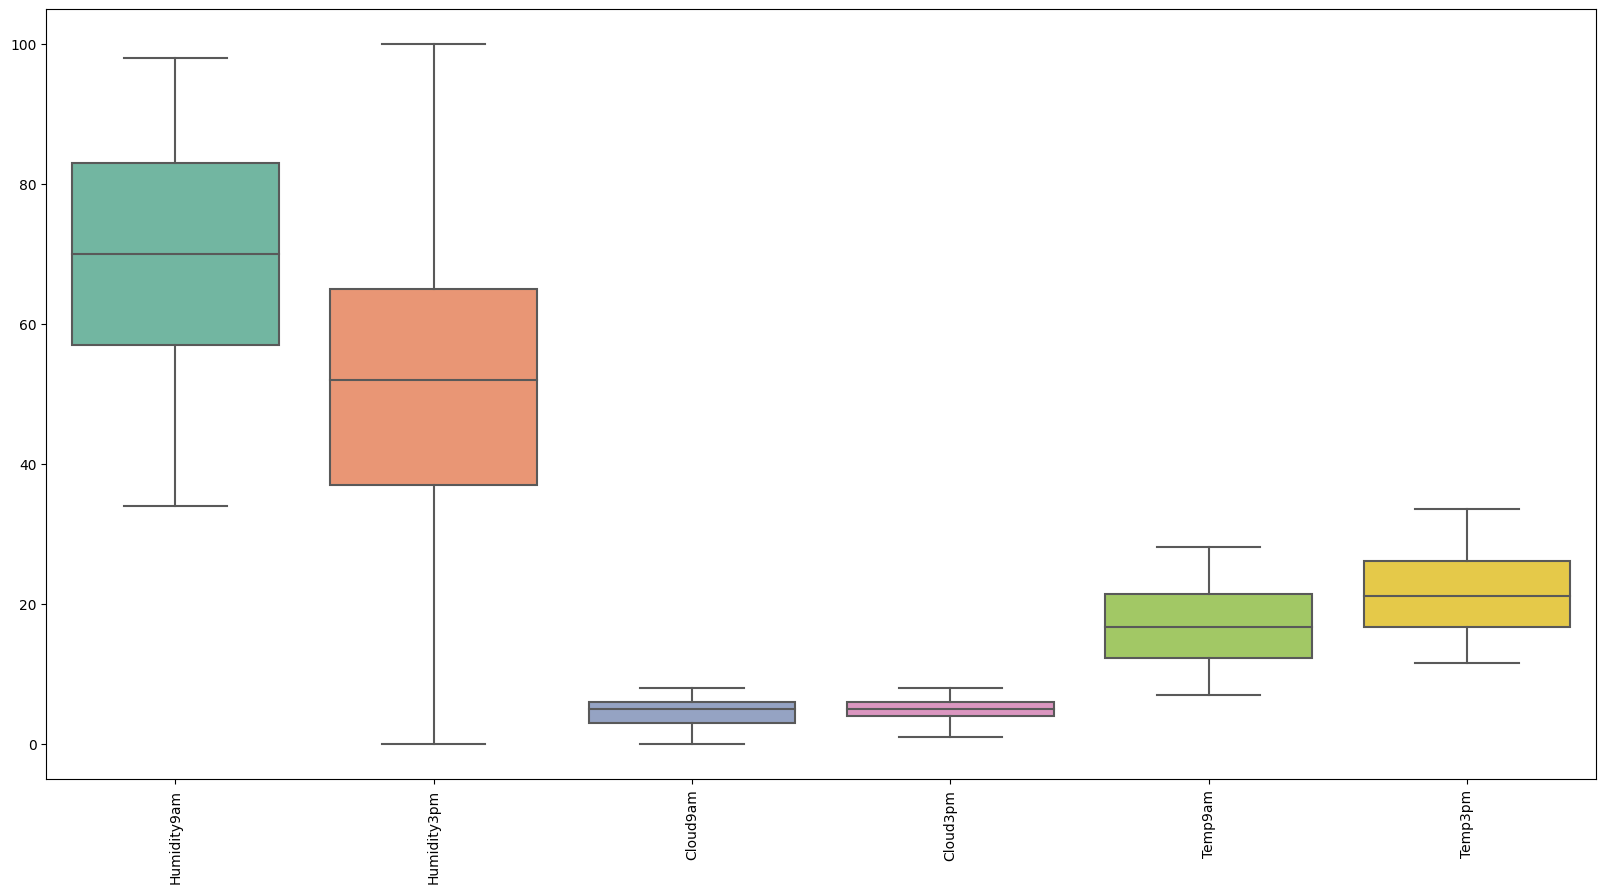

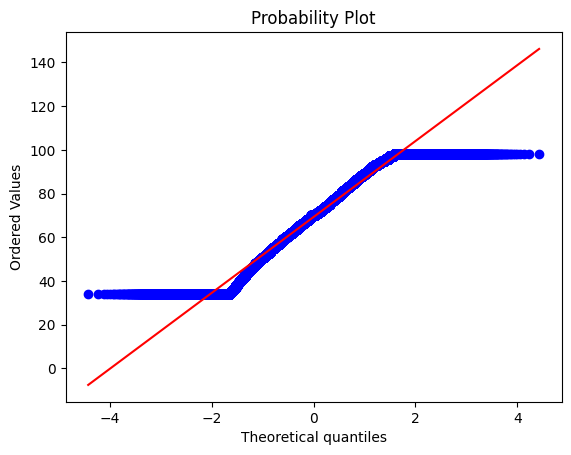

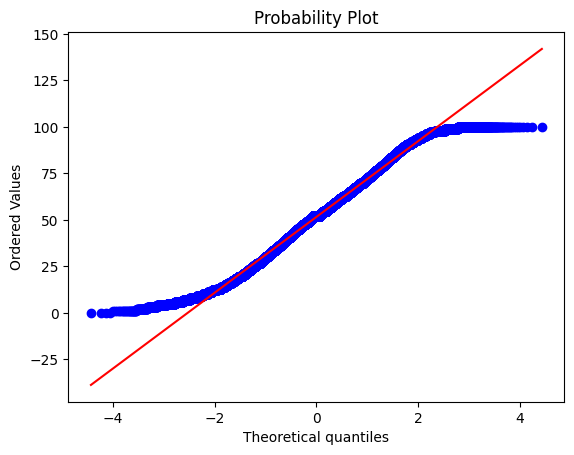

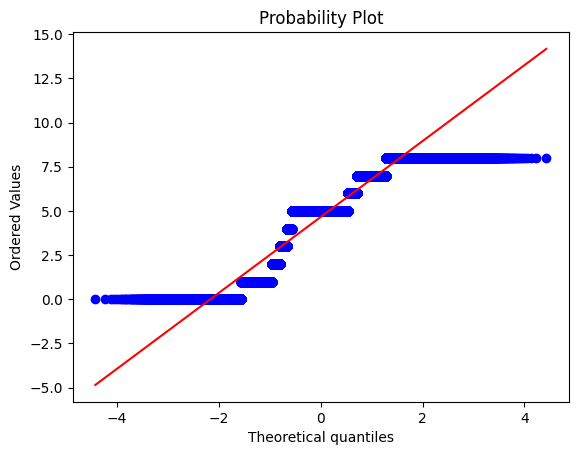

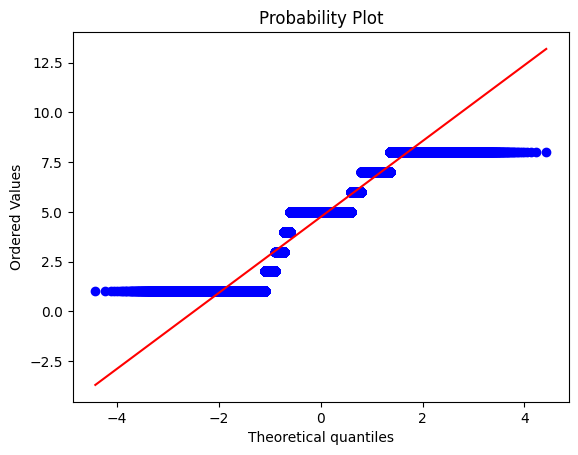

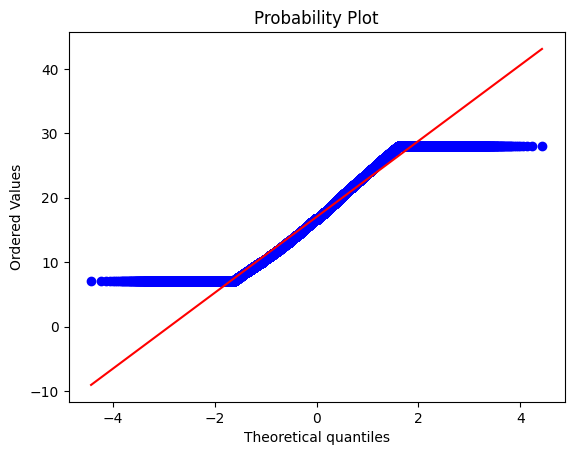

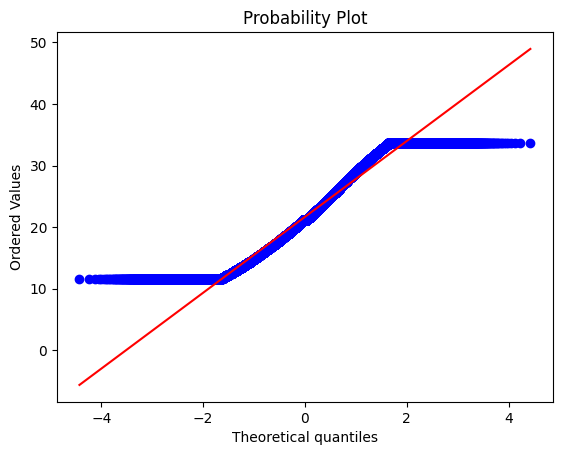

In [24]:
from scipy import stats
import pylab
a3 = ['Humidity9am','Humidity3pm', 'Cloud9am', 'Cloud3pm','Temp9am', 'Temp3pm']
plt.figure(figsize=(20,10))
sns.boxplot(data=X[a3], palette="Set2")
plt.xticks(rotation=90)
plt.show()
for i in a3:
    #q-q plot
    stats.probplot(X[i], dist="norm", plot=pylab)
    pylab.show()

These lines of code implement feature importance analysis using the ExtraTreesClassifier algorithm, fit the model on the training data, and create a bar plot to visualize the top 50 important features.

1. `model = ExtraTreesClassifier()`: This line creates an instance of the ExtraTreesClassifier model. ExtraTreesClassifier is an ensemble learning method that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting.

2. `model.fit(X_train, Y_train)`: This line fits the ExtraTreesClassifier model to the training data. The `fit` method takes two arguments: `X_train` and `Y_train`. `X_train` is the feature matrix that contains the input features of the training data, and `Y_train` is the target vector that contains the corresponding class labels for each data point in `X_train`. The ExtraTreesClassifier algorithm builds multiple decision trees using bootstrap samples and random subsets of features for each split.

3. `feat_importances = pd.Series(model.feature_importances_, index=X.columns)`: This line calculates the feature importances of the trained model. The `feature_importances_` attribute of the ExtraTreesClassifier model provides the relative importance of each feature. A Pandas Series named `feat_importances` is created, where the feature importances are stored along with the corresponding feature names (index).

4. `plt.figure(figsize=(20,10))`: This line creates a new figure for the bar plot using Matplotlib's `figure()` function. The `figsize` parameter is set to `(20, 10)`, which specifies the width and height of the figure in inches. The larger `figsize` values create a wider and taller plot, making it easier to visualize the bar chart.

5. `feat_importances.nlargest(50).plot(kind='bar')`: This line creates the bar plot to visualize the top 50 important features. The `nlargest(50)` method of the Pandas Series is used to select the 50 features with the highest importances. The `plot(kind='bar')` function is used to create a vertical bar chart representing the feature importances.

6. `plt.show()`: This line displays the bar plot on the screen.

In summary, these lines of code create and display a bar plot that shows the feature importances of the input features in the dataset `X` as determined by the ExtraTreesClassifier model. The bar plot allows us to identify the most influential features for the classification task. The higher the feature importance value, the more significant the feature is in predicting the target variable. By analyzing feature importances, one can gain insights into which features are most relevant for the model's predictions and potentially make decisions about feature selection or engineering to improve model performance.

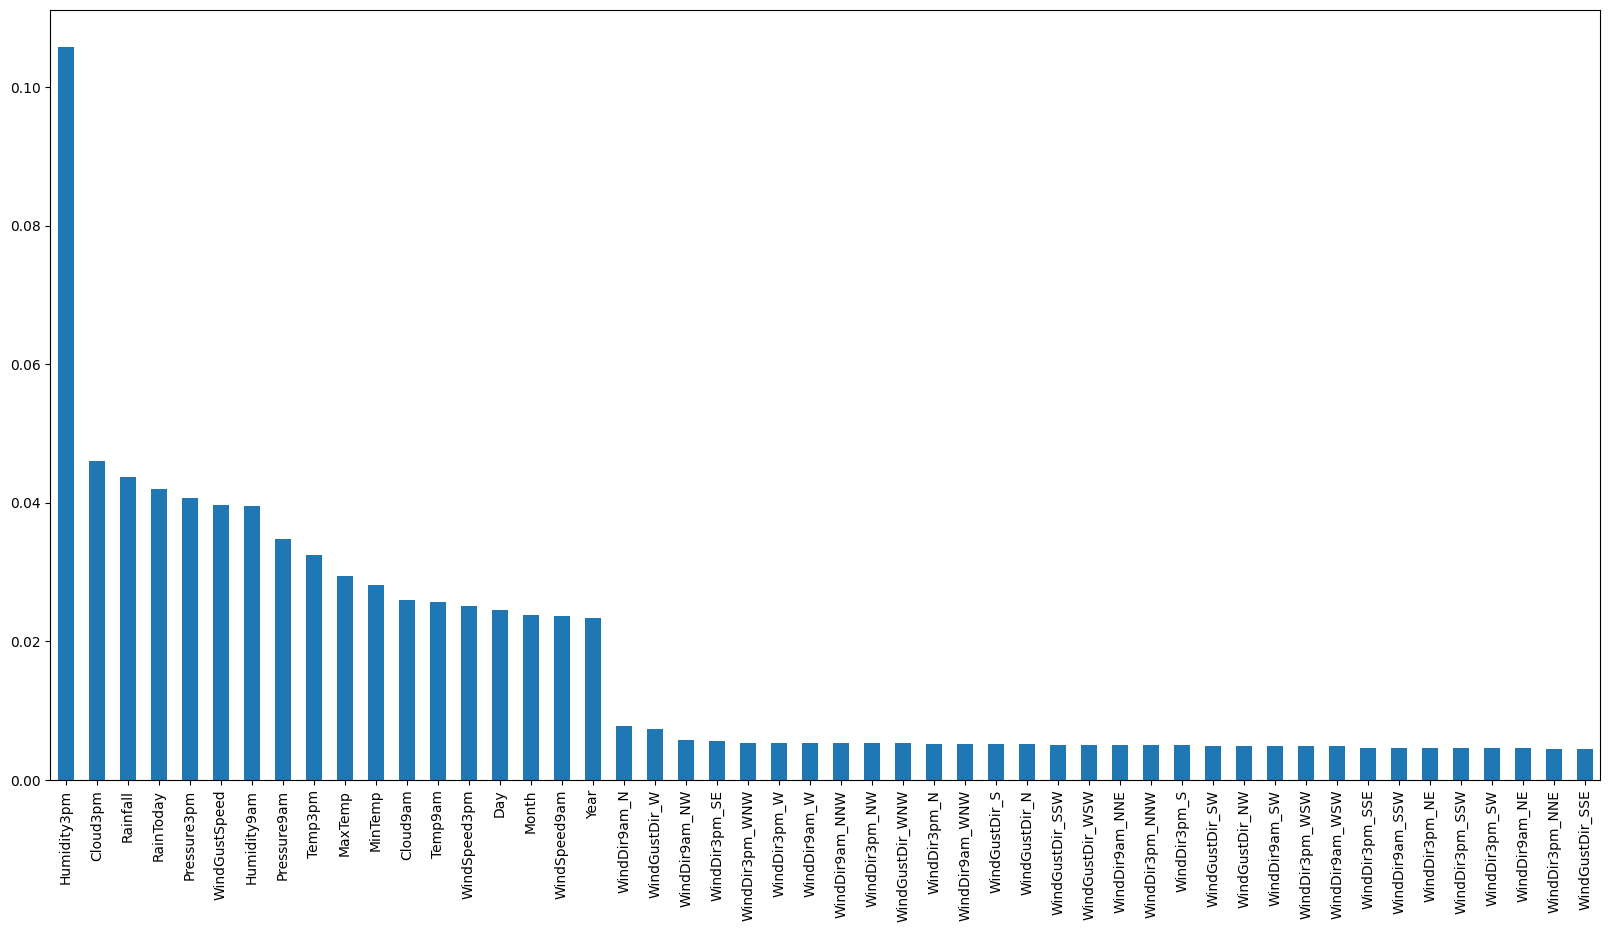

In [25]:
model = ExtraTreesClassifier()
model.fit(X_train,Y_train)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(20,10))
feat_importances.nlargest(50).plot(kind='bar')
plt.show()
